# 연구주제, 데이터셋 선택 사유 및 URL 제출

팀과제 평가(안)  
https://standing-yak-f86.notion.site/HA-HN-460399ae203b46709d1c0c81d6ba0299

**연구주제, 데이터셋 선택 사유**  
항공사고 발생 시, 부상자가 생기는 요인은 무엇인가?

**데이터셋 URL**  
https://www.kaggle.com/datasets/prathamsharma123/aviation-accidents-and-incidents-ntsb-faa-waas

**교수님의 데이터셋 승인 캡쳐**

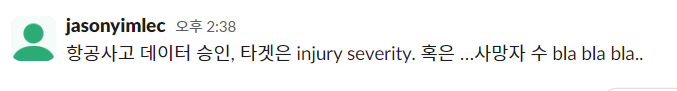

# 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/airline_accidents.csv',encoding='utf-8')
df.shape

<ipython-input-2-474a9bece9c0>:7: DtypeWarning: Columns (0,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/airline_accidents.csv',encoding='utf-8')


(150959, 31)

In [ ]:
df.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,Injury Severity,Aircraft Damage,Aircraft Category,Registration Number,Make,Model,Amateur Built,Number of Engines,Engine Type,FAR Description,Schedule,Purpose of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Publication Date,Unnamed: 30
0,20080125X00106,Accident,SEA08CA056,12/31/2007,"Santa Ana, CA",United States,33.675556,-117.868056,SNA,John Wayne - Orange County,Non-Fatal,Substantial,Airplane,N2800D,Piper,PA-12,No,1,Reciprocating,Part 91: General Aviation,,Instructional,,,,,2,VMC,LANDING,02/28/2008,
1,20080206X00141,Accident,CHI08WA075,12/31/2007,"Guernsey, United Kingdom",United Kingdom,49.435000,-2.600278,,,Non-Fatal,Minor,,,Cessna,T303,No,,,,,Unknown,,,,,1,,,02/06/2008,
2,20080129X00122,Accident,CHI08CA057,12/30/2007,"Alexandria, MN",United States,45.866111,-95.394444,AXN,Chandler Field Airport,Non-Fatal,Substantial,Airplane,N5093F,Lerohl,RV-8,Yes,1,Reciprocating,Part 91: General Aviation,,Personal,,,,,1,VMC,TAKEOFF,02/28/2008,
3,20080114X00045,Accident,LAX08FA043,12/30/2007,"Paso Robles, CA",United States,35.542222,-120.522778,PRB,Paso Robles Airport,Fatal(1),Substantial,Airplane,N254SR,Cirrus Design Corp.,SR22,No,1,Reciprocating,Part 91: General Aviation,,Personal,,1,,,,VMC,MANEUVERING,06/20/2014,
4,20080109X00032,Accident,NYC08FA071,12/30/2007,"Cherokee, AL",United States,34.688611,-87.920000,,,Fatal(3),Substantial,Helicopter,N109AE,BELL,206L-3,No,1,Turbo Shaft,Part 91: General Aviation,,Other Work Use,,3,0,0,0,VMC,MANEUVERING,01/15/2009,


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150959 entries, 0 to 150958
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Event Id                 150959 non-null  object
 1   Investigation Type       150959 non-null  object
 2   Accident Number          150959 non-null  object
 3   Event Date               150959 non-null  object
 4   Location                 150959 non-null  object
 5   Country                  150959 non-null  object
 6   Latitude                 150959 non-null  object
 7   Longitude                150959 non-null  object
 8   Airport Code             150959 non-null  object
 9   Airport Name             150959 non-null  object
 10  Injury Severity          150959 non-null  object
 11  Aircraft Damage          150959 non-null  object
 12  Aircraft Category        150959 non-null  object
 13  Registration Number      150959 non-null  object
 14  Make                

#ID 변수

In [ ]:
#ID 변수를 기존 데이터에 있는 Event Id로 정함
# 약 15만 개의 데이터 중에 912개가 중복되나 이는 항공기끼리 서로 사고가 난 경우 중복되며
# 교수님이 해당 ID 변수로 사용해도 된다고 말씀하심
duplicate_count = df.duplicated(subset=['Event Id']).sum()
duplicate_count

912

In [ ]:
df['Event Id'].dtypes

dtype('O')

#타겟 변수 설정

타겟 변수

부상자 유무





In [ ]:
#범주 생성
#Fatal, Serious, Minor 삭제
# 공백으로 되어 있는 컬럼은 0으로 채워 넣음
df['Total Fatal Injuries'] = pd.to_numeric(df['Total Fatal Injuries'], errors='coerce').fillna(0)
df['Total Serious Injuries'] = pd.to_numeric(df['Total Serious Injuries'], errors='coerce').fillna(0)
df['Total Minor Injuries'] = pd.to_numeric(df['Total Minor Injuries'], errors='coerce').fillna(0)

# injuries 컬럼 생성 및 값 계산
df['Total Injuries'] = df['Total Fatal Injuries'] + df['Total Serious Injuries'] + df['Total Minor Injuries']

df1 = df.drop(['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries'], axis=1)

df1['Total Injuries'].count()

# 부상자가 있는 항공사고의 수
print(sum(df1['Total Injuries'] > 0))
# 부상자가 없는 항공사고의 수
print(sum(df1['Total Injuries'] == 0))

29215
121744


In [ ]:
# 타겟 변수 결측값 확인
df1['Total Injuries'].isnull().sum()

0

In [ ]:
# 타겟 변수 Total Injuries 결측치 확인
df.isna().any()['Total Injuries']

False

In [ ]:
# 부상자가 없는 데이터 81%
# 나머지 부상자가 1명 이상인 데이터 약 19%
df1['Total Injuries'].value_counts(dropna=False,normalize=True)

Total Injuries
0.0      0.806471
1.0      0.097212
2.0      0.058857
3.0      0.015984
4.0      0.011314
5.0      0.003445
6.0      0.002179
7.0      0.000908
8.0      0.000649
10.0     0.000364
9.0      0.000325
12.0     0.000205
13.0     0.000172
11.0     0.000159
14.0     0.000106
15.0     0.000093
20.0     0.000079
16.0     0.000073
18.0     0.000060
23.0     0.000060
25.0     0.000053
17.0     0.000053
22.0     0.000046
19.0     0.000040
30.0     0.000040
21.0     0.000033
24.0     0.000033
44.0     0.000026
47.0     0.000026
26.0     0.000026
33.0     0.000026
71.0     0.000026
64.0     0.000020
75.0     0.000020
35.0     0.000020
29.0     0.000020
40.0     0.000020
90.0     0.000020
31.0     0.000020
65.0     0.000020
154.0    0.000020
39.0     0.000020
50.0     0.000013
121.0    0.000013
36.0     0.000013
70.0     0.000013
110.0    0.000013
118.0    0.000013
28.0     0.000013
92.0     0.000013
57.0     0.000013
87.0     0.000013
158.0    0.000013
34.0     0.000013
104.0    0.00

In [ ]:
#Is Injered 라는 이진화 타겟변수 만드는 코드

df1.loc[df1["Total Injuries"] >= 1, "Is Injured"] = 1  # 총 부상자가 1명이라도 있으면 Is Injured 값은 1
df1.loc[df1["Total Injuries"] <  1, "Is Injured"] = 0  # 총 부상자가 0명이라면 Is Injured 값은 0

#Total Uninjured는 결국 Is Injured가 0이면 해당 값도 0 이므로 삭제한다.
df1.drop(['Total Injuries', 'Total Uninjured'], axis=1, inplace=True)
df1["Is Injured"].value_counts(dropna=False)        # Is Injured 값의 개수 분포 구하기.

Is Injured
0.0    121744
1.0     29215
Name: count, dtype: int64

Incident (사건):

정의: 항공기 운항 중에 발생한, 안전에 영향을 미칠 수 있는 모든 비정상적인 상황을 말합니다. 그러나 이는 항공기의 심각한 손상이나 탑승자의 심각한 부상 없이 끝나는 경우가 많습니다.
예시:
항공기가 지상에서 충돌 없이 활주로를 벗어나는 경우
비행 중 비상 장비가 작동한 경우
항공기 시스템의 경미한 결함이나 오작동

Accident (사고):

정의: 항공기 운항 중에 발생한 사건으로, 다음 중 하나 이상을 포함하는 경우입니다:
사람의 사망 또는 심각한 부상
항공기의 심각한 손상이나 구조적 결함
항공기의 실종 또는 완전히 접근 불가능한 상태

# 기타 변수 데이터 처리

In [ ]:
df1.head(10)

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,Injury Severity,Aircraft Damage,Aircraft Category,Registration Number,Make,Model,Amateur Built,Number of Engines,Engine Type,FAR Description,Schedule,Purpose of Flight,Air Carrier,Weather Condition,Broad Phase of Flight,Report Publication Date,Unnamed: 30,Is Injured
0,20080125X00106,Accident,SEA08CA056,12/31/2007,"Santa Ana, CA",United States,33.675556,-117.868056,SNA,John Wayne - Orange County,Non-Fatal,Substantial,Airplane,N2800D,Piper,PA-12,No,1,Reciprocating,Part 91: General Aviation,,Instructional,,VMC,LANDING,02/28/2008,,0.0
1,20080206X00141,Accident,CHI08WA075,12/31/2007,"Guernsey, United Kingdom",United Kingdom,49.435000,-2.600278,,,Non-Fatal,Minor,,,Cessna,T303,No,,,,,Unknown,,,,02/06/2008,,0.0
2,20080129X00122,Accident,CHI08CA057,12/30/2007,"Alexandria, MN",United States,45.866111,-95.394444,AXN,Chandler Field Airport,Non-Fatal,Substantial,Airplane,N5093F,Lerohl,RV-8,Yes,1,Reciprocating,Part 91: General Aviation,,Personal,,VMC,TAKEOFF,02/28/2008,,0.0
3,20080114X00045,Accident,LAX08FA043,12/30/2007,"Paso Robles, CA",United States,35.542222,-120.522778,PRB,Paso Robles Airport,Fatal(1),Substantial,Airplane,N254SR,Cirrus Design Corp.,SR22,No,1,Reciprocating,Part 91: General Aviation,,Personal,,VMC,MANEUVERING,06/20/2014,,1.0
4,20080109X00032,Accident,NYC08FA071,12/30/2007,"Cherokee, AL",United States,34.688611,-87.920000,,,Fatal(3),Substantial,Helicopter,N109AE,BELL,206L-3,No,1,Turbo Shaft,Part 91: General Aviation,,Other Work Use,,VMC,MANEUVERING,01/15/2009,,1.0
5,20080129X00118,Accident,DEN08CA045,12/29/2007,"Gunnison, CO",United States,38.533889,-106.933056,,,Non-Fatal,Substantial,Airplane,N33MF,Piper,PA-46-310P,No,1,Reciprocating,Part 91: General Aviation,,Personal,,VMC,TAKEOFF,02/28/2008,,0.0
6,20080214X00193,Accident,CHI08CA056,12/29/2007,"Abingdon, IL",United States,40.799722,-90.438611,,,Non-Fatal,Substantial,Airplane,N94131,Ercoupe (Eng & Research Corp.),415D,No,1,Reciprocating,Part 91: General Aviation,,Personal,,VMC,MANEUVERING,02/28/2008,,0.0
7,20080215X00200,Accident,CHI08CA058,12/29/2007,"Crystal Falls, MI",United States,46.800000,-88.360000,,,Non-Fatal,Substantial,Airplane,N8191U,Cessna,172F,No,1,Reciprocating,Part 91: General Aviation,,Personal,,VMC,LANDING,02/28/2008,,0.0
8,20071231X02014,Accident,DFW08FA053,12/29/2007,"Venice, LA",United States,28.958056,-89.258889,,South Pass 38,Fatal(1),Destroyed,Helicopter,N211EL,Bell,206L1,No,1,Turbo Shaft,Part 135: Air Taxi & Commuter,NSCH,,,IMC,APPROACH,07/15/2009,,1.0
9,20080103X00010,Accident,DFW08LA052,12/29/2007,"Crowley, TX",United States,32.557222,-97.485555,,,Fatal(2),Destroyed,Gyrocraft,N136DG,ALTHOUSE,RAF 2000 GTX,Yes,1,Reciprocating,Part 91: General Aviation,,Personal,,VMC,MANEUVERING,12/03/2008,,1.0


In [ ]:
# 'Unnamed: 30' 컬럼은 빈 컬럼이므로 삭제
# 'Accident Number' 컬럼은 항공사고 식별 코드이고 Event Id는 미국 연방 교통안전위원회의 유일한 항공사고 ID인데, 이 두 컬럼 모두 식별 용도로 이용되므로 Accident Number 컬럼을 삭제한다.
# 'Injury Severity' 컬럼은 우리의 연구 주제인 부상자의 유/무와 상관없는 부상의 심각도이므로 Injury Severity 컬럼을 삭제한다.
df1 = df1.drop(['Unnamed: 30', 'Accident Number', 'Injury Severity'], axis=1)

In [ ]:
#Event Id 이벤트 ID
#Investigation Type 인재(incident) or 사고(Accident)
#Accident Number 항공사고 식별 코드 <- Event Id가 있어서 지워도 될듯
#Event Date 사건 날짜
#Location 사건 지역 ex) Venice, LA  -> 미국 LA주의 Venice 시
#Country 나라
#Latitude,Longitude 위도와 경도
#Airport Code , Name 공항 코드와 이름
#Aircraft Damage
#Aircraft Category
#Registration Number 항공기의 고유 식별 번호
#make 항공기 제조사
#model 비행기 모델
#Amateur Built 개인이 만든건지
#Number of Engines 엔진의 수
#Engine Type 엔진 타입
#FAR Description 사건에 관련된 규정
#Schedule 일반적인 운행 or 갑자기 잡힌 운행
#Purpose of Flight 비행목적
#Air Carrier 사고 기체의 항공사
#Weather Condition 날씨
#Broad Phase of Flight 사고 발생의 비행 단계
#Report Publication Date 사건조사 후 발표일
#Total Injuries 타겟 변수 (총 부상자 수)

# Event Id -> 모델 돌리기 전에 삭제될 컬럼
# Investigation Type -> Category 형
# Accident Number -> 삭제할 컬럼
# Event Date -> Date로 형변환
# Location -> Category 형
# Country -> Category 형
# Latitude -> float 형
# Longitude -> float 형
# Airport Code -> Category 형
# Airport Name -> Category 형
# Injury Severity -> 삭제할 컬럼
# Aircraft Damage -> Category 형
# Aircraft Category -> Category 형
# Registration Number -> Category 형
# Make -> Category 형
# Model -> Category 형
# Amateur Built -> Yes는 1로 No는 0으로 -> float 형
# Number of Engines -> float 형 (공백은 0으로)
# Engine Type -> Category 형
# FAR Description -> 사건의 적용된 규졍 Category 형
# Schedule -> Category 형
# Purpose of Flight -> Category 형
# Air Carrier -> Category 형
# Weather Condition -> Category 형
# Broad Phase of Flight -> Category 형
# Report Publication Date -> Date로 형변환
# Unnamed: 30 -> 삭제할 컬럼
# Total Injuries -> 타겟 변수

df1.dtypes

Event Id                    object
Investigation Type          object
Event Date                  object
Location                    object
Country                     object
Latitude                    object
Longitude                   object
Airport Code                object
Airport Name                object
Aircraft Damage             object
Aircraft Category           object
Registration Number         object
Make                        object
Model                       object
Amateur Built               object
Number of Engines           object
Engine Type                 object
FAR Description             object
Schedule                    object
Purpose of Flight           object
Air Carrier                 object
Weather Condition           object
Broad Phase of Flight       object
Report Publication Date     object
Is Injured                 float64
dtype: object

In [ ]:
# Event Date -> year, month, day로
df1['Event Date'] = pd.to_datetime(df1['Event Date'].str.strip(), format='%m/%d/%Y')

# 'Occurred Year', 'Occurred Month', 'Occurred Day' 열을 추가하여 연도, 월, 일 데이터 저장
df1['Occurred Year'] = df1['Event Date'].dt.year
df1['Occurred Month'] = df1['Event Date'].dt.month
df1['Occurred Day'] = df1['Event Date'].dt.day

df1.drop('Event Date', axis=1, inplace=True)

# Report Publication Date Object -> datetime64[ns] 타입으로 변경 (+ 포맷팅도 함께)
df1['Report Publication Date'] = pd.to_datetime(df1['Report Publication Date'].str.strip(), format='%m/%d/%Y')

In [ ]:
# Latitude, Longitude, Number of Engines float64로 변경
numeric_columns = ['Latitude', 'Longitude', 'Number of Engines']
for column in numeric_columns:
    df1[column] = pd.to_numeric(df1[column], errors='coerce')

In [ ]:
# ID 변수인 Event Id를 제외한 나머지 데이터 처리 완료 , Injery Severity 또한 .. 중복되기에 삭제 가능성이 있어 일단 변환하지 않음
# Event Date,Report Publication Date  datetime64[ns] 타입으로 변경
# Latitude,Longitude,Number of Engines float64로 변경
df1.dtypes

Event Id                           object
Investigation Type                 object
Location                           object
Country                            object
Latitude                          float64
Longitude                         float64
Airport Code                       object
Airport Name                       object
Aircraft Damage                    object
Aircraft Category                  object
Registration Number                object
Make                               object
Model                              object
Amateur Built                      object
Number of Engines                 float64
Engine Type                        object
FAR Description                    object
Schedule                           object
Purpose of Flight                  object
Air Carrier                        object
Weather Condition                  object
Broad Phase of Flight              object
Report Publication Date    datetime64[ns]
Is Injured                        

In [ ]:
df1.head(10)

,Event Id,Investigation Type,Location,Country,Latitude,Longitude,Airport Code,Airport Name,Aircraft Damage,Aircraft Category,Registration Number,Make,Model,Amateur Built,Number of Engines,Engine Type,FAR Description,Schedule,Purpose of Flight,Air Carrier,Weather Condition,Broad Phase of Flight,Report Publication Date,Is Injured,Occurred Year,Occurred Month,Occurred Day
0,20080125X00106,Accident,"Santa Ana, CA",United States,33.675556,-117.868056,SNA,John Wayne - Orange County,Substantial,Airplane,N2800D,Piper,PA-12,No,1.0,Reciprocating,Part 91: General Aviation,,Instructional,,VMC,LANDING,2008-02-28,0.0,2007.0,12.0,31.0
1,20080206X00141,Accident,"Guernsey, United Kingdom",United Kingdom,49.435000,-2.600278,,,Minor,,,Cessna,T303,No,NaN,,,,Unknown,,,,2008-02-06,0.0,2007.0,12.0,31.0
2,20080129X00122,Accident,"Alexandria, MN",United States,45.866111,-95.394444,AXN,Chandler Field Airport,Substantial,Airplane,N5093F,Lerohl,RV-8,Yes,1.0,Reciprocating,Part 91: General Aviation,,Personal,,VMC,TAKEOFF,2008-02-28,0.0,2007.0,12.0,30.0
3,20080114X00045,Accident,"Paso Robles, CA",United States,35.542222,-120.522778,PRB,Paso Robles Airport,Substantial,Airplane,N254SR,Cirrus Design Corp.,SR22,No,1.0,Reciprocating,Part 91: General Aviation,,Personal,,VMC,MANEUVERING,2014-06-20,1.0,2007.0,12.0,30.0
4,20080109X00032,Accident,"Cherokee, AL",United States,34.688611,-87.920000,,,Substantial,Helicopter,N109AE,BELL,206L-3,No,1.0,Turbo Shaft,Part 91: General Aviation,,Other Work Use,,VMC,MANEUVERING,2009-01-15,1.0,2007.0,12.0,30.0
5,20080129X00118,Accident,"Gunnison, CO",United States,38.533889,-106.933056,,,Substantial,Airplane,N33MF,Piper,PA-46-310P,No,1.0,Reciprocating,Part 91: General Aviation,,Personal,,VMC,TAKEOFF,2008-02-28,0.0,2007.0,12.0,29.0
6,20080214X00193,Accident,"Abingdon, IL",United States,40.799722,-90.438611,,,Substantial,Airplane,N94131,Ercoupe (Eng & Research Corp.),415D,No,1.0,Reciprocating,Part 91: General Aviation,,Personal,,VMC,MANEUVERING,2008-02-28,0.0,2007.0,12.0,29.0
7,20080215X00200,Accident,"Crystal Falls, MI",United States,46.800000,-88.360000,,,Substantial,Airplane,N8191U,Cessna,172F,No,1.0,Reciprocating,Part 91: General Aviation,,Personal,,VMC,LANDING,2008-02-28,0.0,2007.0,12.0,29.0
8,20071231X02014,Accident,"Venice, LA",United States,28.958056,-89.258889,,South Pass 38,Destroyed,Helicopter,N211EL,Bell,206L1,No,1.0,Turbo Shaft,Part 135: Air Taxi & Commuter,NSCH,,,IMC,APPROACH,2009-07-15,1.0,2007.0,12.0,29.0
9,20080103X00010,Accident,"Crowley, TX",United States,32.557222,-97.485555,,,Destroyed,Gyrocraft,N136DG,ALTHOUSE,RAF 2000 GTX,Yes,1.0,Reciprocating,Part 91: General Aviation,,Personal,,VMC,MANEUVERING,2008-12-03,1.0,2007.0,12.0,29.0


# 결측값 50% 초과 변수 제거

In [ ]:
# 이 결과는 NaN 과 공백('')까지 결측치로 간주해서 결측값이 50%이상인 변수들
def count_missing(s):
    return s.isnull().sum() + s.apply(lambda x: isinstance(x, str) and x.strip() == '').sum()

missing_counts = df1.apply(count_missing)
missing_counts

Event Id                        0
Investigation Type          87046
Location                       52
Country                       507
Latitude                   138985
Longitude                  138995
Airport Code               116096
Airport Name               113581
Aircraft Damage             88691
Aircraft Category          143206
Registration Number          1281
Make                           22
Model                         107
Amateur Built                 102
Number of Engines           89594
Engine Type                 88498
FAR Description             56154
Schedule                   141046
Purpose of Flight           88765
Air Carrier                147848
Weather Condition           87554
Broad Phase of Flight       89235
Report Publication Date     99786
Is Injured                      0
Occurred Year                   7
Occurred Month                  7
Occurred Day                    7
dtype: int64

In [ ]:
# 결측치가 존재하는 데이터들 중에 결측치가 많다고 제거한다면 우리가 쓸 수 있는
# 변수가 매우 한정적이기에 결측치를 최빈값으로 대체하는 것으로 결정

import re

# 이 결과는 NaN과 공백('')까지 결측치로 간주해서 결측값이 50% 이상인 변수들
def count_missing(s):
    return s.isnull().sum() + s.apply(lambda x: isinstance(x, str) and x.strip() == '').sum()

# 최빈값 계산 함수 (NaN과 모든 공백(' ')을 최빈값으로 대체)
def mode_filler(s):
    mode_value = s.mode().iloc[0]  # 최빈값 계산
    s = s.replace(r'^\s*$', np.nan, regex=True)  # 모든 공백을 NaN으로 대체
    mode_value = s.mode().iloc[0]  # 최빈값 재계산
    return s.fillna(mode_value)  # NaN 값 대체


# 결측치 비율 계산
missing_counts = df1.apply(count_missing)
missing_ratios = missing_counts / len(df1)

# 결측치가 50% 이상인 열 선택
columns_to_replace = missing_ratios[missing_ratios >= 0.5].index

print(list[columns_to_replace])

# 선택된 열에 대해 NaN 값과 공백을 최빈값으로 대체
df1[columns_to_replace] = df1[columns_to_replace].apply(mode_filler)

list[Index(['Investigation Type', 'Latitude', 'Longitude', 'Airport Code',
       'Airport Name', 'Aircraft Damage', 'Aircraft Category',
       'Number of Engines', 'Engine Type', 'Schedule', 'Purpose of Flight',
       'Air Carrier', 'Weather Condition', 'Broad Phase of Flight',
       'Report Publication Date'],
      dtype='object')]


In [ ]:
#최빈값 대체후  Null 몇개 존재하는지 확인
df1.isnull().sum()

Event Id                   0
Investigation Type         0
Location                   0
Country                    0
Latitude                   0
Longitude                  0
Airport Code               0
Airport Name               0
Aircraft Damage            0
Aircraft Category          0
Registration Number        0
Make                       0
Model                      0
Amateur Built              0
Number of Engines          0
Engine Type                0
FAR Description            0
Schedule                   0
Purpose of Flight          0
Air Carrier                0
Weather Condition          0
Broad Phase of Flight      0
Report Publication Date    0
Is Injured                 0
Occurred Year              7
Occurred Month             7
Occurred Day               7
dtype: int64

In [ ]:
# 결측치와 공백이 50%이상인 컬럼을 제거한 후 남은 컬럼
def count_missing(s):
    return s.isnull().sum() + s.apply(lambda x: isinstance(x, str) and x.strip() == '').sum()

missing_counts = df1.apply(count_missing)
missing_counts

Event Id                       0
Investigation Type             0
Location                      52
Country                      507
Latitude                       0
Longitude                      0
Airport Code                   0
Airport Name                   0
Aircraft Damage                0
Aircraft Category              0
Registration Number         1281
Make                          22
Model                        107
Amateur Built                102
Number of Engines              0
Engine Type                    0
FAR Description            56154
Schedule                       0
Purpose of Flight              0
Air Carrier                    0
Weather Condition              0
Broad Phase of Flight          0
Report Publication Date        0
Is Injured                     0
Occurred Year                  7
Occurred Month                 7
Occurred Day                   7
dtype: int64

In [ ]:
df1['Number of Engines'].value_counts()

Number of Engines
1.0    141018
2.0      8215
0.0       927
3.0       452
4.0       347
Name: count, dtype: int64

# 요약 통계 및 도수분포표 검토

In [ ]:
df1.dtypes

Event Id                           object
Investigation Type                 object
Location                           object
Country                            object
Latitude                          float64
Longitude                         float64
Airport Code                       object
Airport Name                       object
Aircraft Damage                    object
Aircraft Category                  object
Registration Number                object
Make                               object
Model                              object
Amateur Built                      object
Number of Engines                 float64
Engine Type                        object
FAR Description                    object
Schedule                           object
Purpose of Flight                  object
Air Carrier                        object
Weather Condition                  object
Broad Phase of Flight              object
Report Publication Date    datetime64[ns]
Is Injured                        

In [ ]:
# 구간 변수를 cols에 저장
# 우리의 데이터셋에는 타겟 변수도 이진값의 부상자 유무이고
# 다른 컬럼들 또한 대부분 범주형(category) 변수이기에 Event Date에서 추출한 년/월/일 정보만 통계를 구함
cols = ['Occurred Year','Occurred Month','Occurred Day']

# 구간(interval) 변수의 요약통계 구하기
df1[cols].describe()

,Occurred Year,Occurred Month,Occurred Day
count,150952.000000,150952.000000,150952.000000
mean,1980.885931,6.555481,15.760858
std,12.256855,3.106044,8.848316
min,1948.000000,1.000000,1.000000
25%,1970.000000,4.000000,8.000000
50%,1979.000000,7.000000,16.000000
75%,1990.000000,9.000000,23.000000
max,2007.000000,12.000000,31.000000


In [ ]:
# 위 변수들의 왜도 구하기
df1[cols].skew() # +- 3 이하면 OK

Occurred Year     0.485619
Occurred Month   -0.044076
Occurred Day      0.001004
dtype: float64

In [ ]:
# 위 변수들의 첨도 구하기
df1[cols].kurtosis() # +- 10 이하면 OK

Occurred Year    -0.885069
Occurred Month   -0.936928
Occurred Day     -1.204718
dtype: float64

In [ ]:
# Total Injuries 와 Total Uninjured 데이터가 정규분포에 벗어남..
# 1. 로그 변환으로 정규분포에 가깝게 만들어 버린다?
# Total Injuries와 Total Uninjured에 로그 변환 적용
# import numpy as np

# df1['Total Injuries (Log)'] = np.log(df1['Total Injuries'] + 1)  # 0인 값이 있을 경우를 대비하여 1을 더해줍니다.
# df1['Total Uninjured (Log)'] = np.log(df1['Total Uninjured'] + 1)

# # 변환된 데이터의 skewness(왜도)와 kurtosis(첨도) 확인
# # 변환을 하니까 그나마 좋아지긴 하는데.. 조금 벗어나는 수치

# print("Total Injuries (Log) Skewness:", df1['Total Injuries (Log)'].skew())
# print("Total Injuries (Log) Kurtosis:", df1['Total Injuries (Log)'].kurtosis())
# print("Total Uninjured (Log) Skewness:", df1['Total Uninjured (Log)'].skew())
# print("Total Uninjured (Log) Kurtosis:", df1['Total Uninjured (Log)'].kurtosis())

# df1['Is Injured (Log)'] = np.log(df1[''] + 1) # 0인 값이 있을 경우를 대비하여 1을 더해줍니다.
# print("Is Injured (Log) Skewness:", df1['Is Injured (Log)'].skew())
# print("Is Injured (Log) Kurtosis:", df1['Is Injured (Log)'].kurtosis())

In [ ]:
# 사건 발생년도와 부상자가 있는 항공사고의 수 간의 관계
# 1982년부터 급격하게 부상자가 발생한 항공사고가 늘어났고
# 최근들어 조금씩 감소하는 추세로 통계를 해석할 수 있음
pd.crosstab(df1['Occurred Year'], df1['Is Injured'])

Is Injured,0.0,1.0
Occurred Year,,
1948.0,0,1
1962.0,72,1
1963.0,78,0
1964.0,5293,0
1965.0,5428,0
1966.0,5966,0
1967.0,6392,0
1968.0,5267,0
1969.0,5082,0


# 이상값 제거

In [ ]:
# 엔진의 수는 연속형 변수가 아닌 0, 1, 2, 3, 4 의 값만 가지는 이산형 데이터임
df1['Number of Engines'].value_counts(dropna=False)

Number of Engines
1.0    141018
2.0      8215
0.0       927
3.0       452
4.0       347
Name: count, dtype: int64

In [ ]:
# 구간변수별 IQR 구하기
Q1 = df1[['Occurred Year','Occurred Month','Occurred Day']].quantile(0.25)
Q3 = df1[['Occurred Year','Occurred Month','Occurred Day']].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

Occurred Year     20.0
Occurred Month     5.0
Occurred Day      15.0
dtype: float64


In [ ]:
# 하한 구하기
Lower = Q1-3.0*IQR
print(Lower)

Occurred Year     1910.0
Occurred Month     -11.0
Occurred Day       -37.0
dtype: float64


In [ ]:
# 상한 구하기
Upper = Q3+3.0*IQR
print(Upper)

Occurred Year     2050.0
Occurred Month      24.0
Occurred Day        68.0
dtype: float64


In [ ]:
#Lower보다 작거나 , Upper 값 이상도 제거
c1 = df1['Occurred Year'] >= 1910
c2 = df1['Occurred Year'] <= 2050

c3 = df1['Occurred Month'] >= -11
c4 = df1['Occurred Month'] <= 24

c5 = df1['Occurred Day'] >= -37
c6 = df1['Occurred Day'] < 68

df1 = df1[c1 & c2 & c3 & c4 & c5 & c6]

# 상관계수 검토, t-검정

In [ ]:
# 구간 변수를 cols에 저장
cols = ['Occurred Year','Occurred Month','Occurred Day']

# 구간 변수간 상관계수 디스플레이
# 절대값이 0.7 이상인 것은 없으므로 제거 필요 X
round(df1[cols].corr(), 2)

,Occurred Year,Occurred Month,Occurred Day
Occurred Year,1.00,0.01,-0.00
Occurred Month,0.01,1.00,-0.02
Occurred Day,-0.00,-0.02,1.00


In [ ]:
# Occurred Year,Month,day 에는 결측치가 없어서 따로 제거 안해도 괜찮다
print(df1['Occurred Year'].isnull().sum())
print(df1['Occurred Month'].isnull().sum())
print(df1['Occurred Day'].isnull().sum())

0
0
0


In [ ]:
from scipy import stats

# t-검정을 실시
data_1 = df1[df1['Is Injured'] == 1]['Occurred Year']
data_0 = df1[df1['Is Injured'] == 0]['Occurred Year']

# 결과는 pvalue < 0.05 => 귀무가설을 기각한다 => 변수와 상관이 있다.
# 사건 발생년도는 타겟변수(부상자가 있는 항공사고 or 부상자가 없는 항공사고)에 상관이 있다.
stats.ttest_ind(data_1, data_0)


TtestResult(statistic=221.58400439237624, pvalue=0.0, df=150950.0)

In [ ]:
# t-검정을 실시
data_1 = df1[df1['Is Injured'] == 1]['Occurred Month']
data_0 = df1[df1['Is Injured'] == 0]['Occurred Month']

# 결과는 pvalue < 0.05 => 귀무가설을 기각한다 => 변수와 상관이 있다.
# 사건 발생월은 타겟변수(부상자가 있는 항공사고 or 부상자가 없는 항공사고)에 상관이 있다.
stats.ttest_ind(data_1, data_0)

TtestResult(statistic=7.00379133527181, pvalue=2.5016191603665953e-12, df=150950.0)

In [ ]:
# t-검정을 실시
data_1 = df1[df1['Is Injured'] == 1]['Occurred Day']
data_0 = df1[df1['Is Injured'] == 0]['Occurred Day']

# 결과는 pvalue > 0.05 => 귀무가설을 기각한다 => 변수와 상관이 없다.
# 사건 발생의 일 데이터는 타겟변수(부상자가 있는 항공사고 or 부상자가 없는 항공사고)에 상관이 없다.
stats.ttest_ind(data_1, data_0)

TtestResult(statistic=-0.467876492819575, pvalue=0.6398735903338857, df=150950.0)

# 시각화

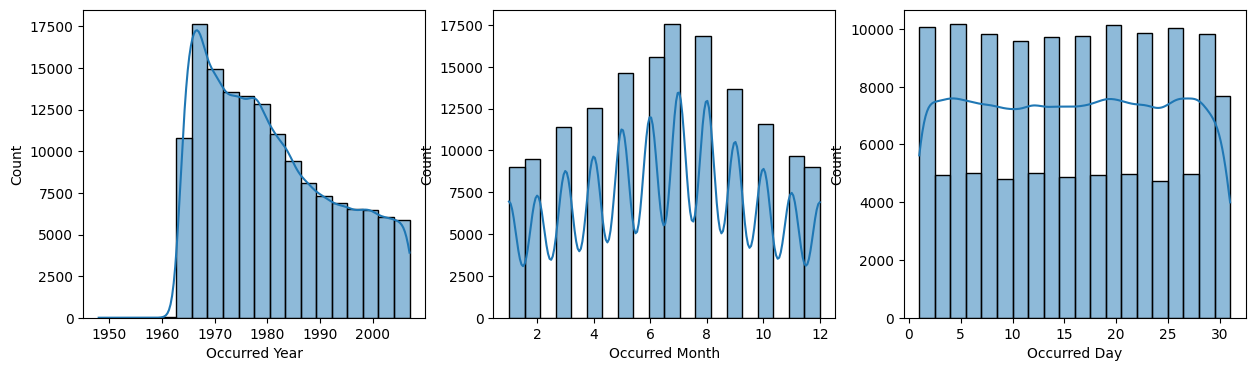

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(ax=axes[0], data=df1, x="Occurred Year", kde=True, bins=20);
sns.histplot(ax=axes[1], data=df1, x="Occurred Month", kde=True, bins=20);
sns.histplot(ax=axes[2], data=df1, x="Occurred Day", kde=True, bins=20);
plt.show();

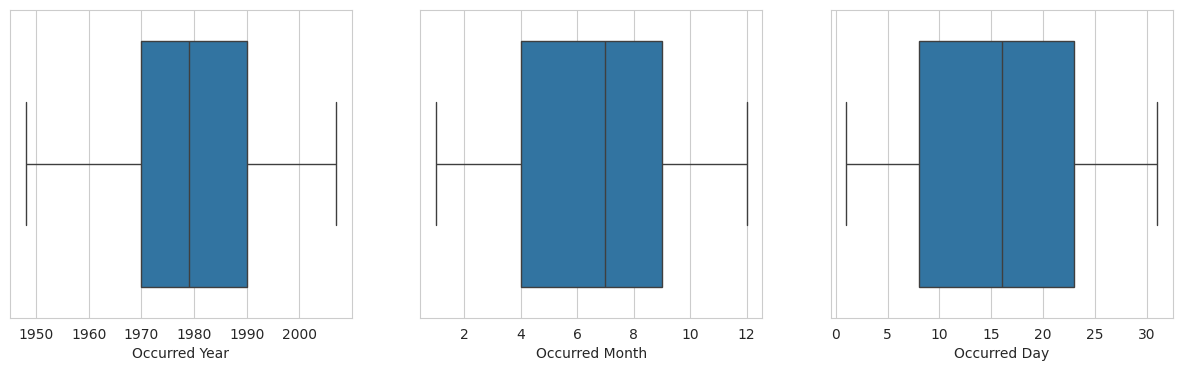

In [ ]:
sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax=axes[0], x = 'Occurred Year', data = df1)
sns.boxplot(ax=axes[1], x = 'Occurred Month', data = df1)
sns.boxplot(ax=axes[2], x = 'Occurred Day', data = df1);

# 데이터 추가 처리 for 머신러닝/딥러닝 입력용

In [ ]:
df1.dtypes

Event Id                           object
Investigation Type                 object
Location                           object
Country                            object
Latitude                          float64
Longitude                         float64
Airport Code                       object
Airport Name                       object
Aircraft Damage                    object
Aircraft Category                  object
Registration Number                object
Make                               object
Model                              object
Amateur Built                      object
Number of Engines                 float64
Engine Type                        object
FAR Description                    object
Schedule                           object
Purpose of Flight                  object
Air Carrier                        object
Weather Condition                  object
Broad Phase of Flight              object
Report Publication Date    datetime64[ns]
Is Injured                        

In [ ]:
# 범주형 변수의 변환
# Investigation Type -> Category 형
# Location -> Category 형
# Country -> Category 형
# Airport Code -> Category 형
# Airport Name -> Category 형
# Aircraft Damage -> Category 형
# Aircraft Category -> Category 형
# Registration Number -> Category 형
# Make -> Category 형
# Model -> Category 형
# Engine Type -> Category 형
# FAR Description -> 사건의 적용된 규졍 Category 형
# Schedule -> Category 형
# Purpose of Flight -> Category 형
# Air Carrier
# Weather Condition -> Category 형
# Broad Phase of Flight -> Category 형

# 범주형 변수만 저장
category_columns = [
    'Investigation Type', 'Location', 'Country','Airport Code','Airport Name',
    'Aircraft Damage','Aircraft Category','Air Carrier',
    'Make', 'Model','Amateur Built', 'Engine Type','FAR Description',
    'Schedule','Purpose of Flight','Weather Condition','Broad Phase of Flight'
]

# 위도, 경도에 결측치가 너무 많아 지움 (최빈값으로 대체하는 것도 이상)
# 보고서 작성의 완료 날짜는 부상자의 요인이 아니기에 삭제한다.
# 항공기 고유 번호는 요인 보다는 식별의 의미가 커 삭제한다.
df2 = df1.drop(['Latitude','Longitude', 'Report Publication Date', 'Registration Number'], axis=1)

# 각 컬럼에 대해 공백 제거 + 대문자 변환 후 카테고리 타입으로 형변환
for col in category_columns:
    df2[col] = df1[col].str.strip()
    df2[col] = df2[col].str.upper().astype('category')

In [ ]:
# 모든 범주형 변수를 더미 변수를 만들면
# 범주의 개수가 너무 많아서 많은 컬럼이 생성돼, 코랩의 RAM을 초과한다.
# 범주형을 알아보기 쉽게 하기위해 이전에 데이터 타입을 category 형으로 바꿨음
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def limit_categories(df, column, n):
    # 상위 n개의 카테고리 추출
    top_categories = df[column].value_counts().index[:n]
    # 상위 n개의 카테고리로 제한하고 나머지는 'OTHER'로 변경
    df[column] = df[column].apply(lambda x: x if x in top_categories else 'OTHER')
    return df

# 각 컬럼에 대해 상위 40개 범주로 제한
for col in category_columns:
    df2 = limit_categories(df2, col, 40)

# OneHotEncoder 생성
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# 선택한 범주형 컬럼에 대해 One-Hot Encoding 수행
df2_oneHot = encoder.fit_transform(df2[category_columns])

# 인코딩된 결과를 DataFrame으로 변환
df2_oneHot_df = pd.DataFrame(df2_oneHot, columns=encoder.get_feature_names_out(category_columns))

# 원본 DataFrame에서 인코딩된 컬럼을 제거하고 인코딩된 DataFrame과 결합
df2 = df2.drop(columns=category_columns)
df2_encoded = pd.concat([df2, df2_oneHot_df], axis=1)

# 결과 확인
list(df2_encoded.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


['Event Id',
 'Number of Engines',
 'Is Injured',
 'Occurred Year',
 'Occurred Month',
 'Occurred Day',
 'Investigation Type_ACCIDENT',
 'Investigation Type_INCIDENT',
 'Location_ALBUQUERQUE, NM',
 'Location_ANCHORAGE, AK',
 'Location_ATLANTA, GA',
 'Location_BAKERSFIELD, CA',
 'Location_BROOMFIELD, CO',
 'Location_CHICAGO, IL',
 'Location_COLUMBUS, OH',
 'Location_CORONA, CA',
 'Location_DALLAS, TX',
 'Location_DENVER, CO',
 'Location_DETROIT, MI',
 'Location_EL PASO, TX',
 'Location_ENGLEWOOD, CO',
 'Location_FAIRBANKS, AK',
 'Location_FORT WORTH, TX',
 'Location_FRESNO, CA',
 'Location_HOUSTON, TX',
 'Location_INDIANAPOLIS, IN',
 'Location_JACKSONVILLE, FL',
 'Location_JAMAICA, NY',
 'Location_KENAI, AK',
 'Location_LAS VEGAS, NV',
 'Location_LONG BEACH, CA',
 'Location_LOS ANGELES, CA',
 'Location_MESA, AZ',
 'Location_MIAMI, FL',
 'Location_ORLANDO, FL',
 'Location_OTHER',
 'Location_PHOENIX, AZ',
 'Location_RENO, NV',
 'Location_SACRAMENTO, CA',
 'Location_SAN ANTONIO, TX',
 'Loc

In [ ]:
# 결측 범주 삭제
df2_encoded.drop(['Country_', 'Airport Code_NONE', 'Airport Name_N/A', 'Airport Name_NONE',
                'Aircraft Category_UNKNOWN', 'Engine Type_UNKNOWN', 'Purpose of Flight_UNKNOWN',
                'Broad Phase of Flight_UNKNOWN', 'Amateur Built_', 'FAR Description_UNKNOWN', 'FAR Description_', 'Weather Condition_UNK'],
                 axis = 1, inplace=True)

In [ ]:
# 기준 더미 변수 설정
# 빈도수 기준 상위 40개만 채택한 범주들 중 가장 낮은 빈도수(즉 40번째로 많은 값)를 기준 더미 변수로 채택한다.

for col in category_columns:
    # 현재 변수에 대한 더미 변수들의 합산
    dummy_vars_sum = df2_encoded.filter(like=col).sum(axis=0)
    # 더미 변수들 중 가장 적은 빈도를 가진 열 선택
    min_dummy_var = dummy_vars_sum.idxmin()
    print(min_dummy_var) # 기준 더미 변수
    # 해당 더미 변수 삭제
    df2_encoded = df2_encoded.drop(columns=[min_dummy_var])

# 결과 확인
list(df2_encoded.columns)

Investigation Type_INCIDENT
Location_MESA, AZ
Country_WEST INDIES
Airport Code_CMA
Airport Name_FAIRBANKS INTERNATIONAL
Aircraft Damage_MINOR
Aircraft Category_BLIMP
Air Carrier_AMERICAN AIRLINES INC
Make_GRUM AMER
Model_G-164
Amateur Built_YES
Engine Type_REC, TJ, TJ
FAR Description_ARMED FORCES
Schedule_SCHD
Purpose of Flight_AIR DROP
Weather Condition_IMC
Broad Phase of Flight_OTHER


['Event Id',
 'Number of Engines',
 'Is Injured',
 'Occurred Year',
 'Occurred Month',
 'Occurred Day',
 'Investigation Type_ACCIDENT',
 'Location_ALBUQUERQUE, NM',
 'Location_ANCHORAGE, AK',
 'Location_ATLANTA, GA',
 'Location_BAKERSFIELD, CA',
 'Location_BROOMFIELD, CO',
 'Location_CHICAGO, IL',
 'Location_COLUMBUS, OH',
 'Location_CORONA, CA',
 'Location_DALLAS, TX',
 'Location_DENVER, CO',
 'Location_DETROIT, MI',
 'Location_EL PASO, TX',
 'Location_ENGLEWOOD, CO',
 'Location_FAIRBANKS, AK',
 'Location_FORT WORTH, TX',
 'Location_FRESNO, CA',
 'Location_HOUSTON, TX',
 'Location_INDIANAPOLIS, IN',
 'Location_JACKSONVILLE, FL',
 'Location_JAMAICA, NY',
 'Location_KENAI, AK',
 'Location_LAS VEGAS, NV',
 'Location_LONG BEACH, CA',
 'Location_LOS ANGELES, CA',
 'Location_MIAMI, FL',
 'Location_ORLANDO, FL',
 'Location_OTHER',
 'Location_PHOENIX, AZ',
 'Location_RENO, NV',
 'Location_SACRAMENTO, CA',
 'Location_SAN ANTONIO, TX',
 'Location_SAN DIEGO, CA',
 'Location_SAN JOSE, CA',
 'Loca

# StandardScaler()로 표준화한 데이터셋 생성 및 저장

In [ ]:
# # 구간 변수들만 별도로 모아 데이터프레임 df_num을 만든다.
# numeric_cols = ['Number of Engines', 'Occurred Year', 'Occurred Month', 'Occurred Day']

# df_num = df2[numeric_cols]
# print(df_num.head()) #데이터 스케일 표준화 전

# # StandardScaler()로 데이터 스케일 표준화를 실행하고 결과를 데이터프레임으로 만든다.
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_num_standard = pd.DataFrame(scaler.fit_transform(df_num))

# # StandardScaler( )는 변수명을 지우므로, 새로 만든 데이터프레임에 다시 변수명을 넣는다.
# df_num_standard.columns = df_num.columns
# df_num_standard.head()

In [ ]:
# df_cat = df2.drop(numeric_cols, axis=1) # 원래 데이터프레임 df2에서 구간 변수들을 제거하여 df_cat에 저장

In [ ]:
# # 구간변수 스케일을 표준화한 df_num_standard와 범주형 변수만 담은 df_cat을 병합
# dfu_standard = pd.concat([df_num_standard, df_cat], axis=1)
# dfu_standard.columns   # dfu의 변수명을 나열

# 데이터 분할 및 대체

In [ ]:
df2_encoded = df2_encoded.drop(['Event Id'],axis=1)
data = df2_encoded.drop(['Is Injured'], axis=1)   # 타겟변수를 제외한 변수만 data에 저장 -> 설명변수 (타겟변수를 제외한 모든 변수를 의미)

target = df2_encoded['Is Injured']                # 타겟변수만 target에 저장

from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=0.333, random_state=2) # 타겟변수의 소수 클래스 및 다수 클래스를
                                                                          # 1:3의 비율(=1/3)로 언더샘플링
data_under, target_under = undersample.fit_resample(data, target) # data 및 target에 언더샘플링 적용

In [ ]:
# 50:50 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data_under, target_under, test_size=0.5, random_state=42, stratify=target_under)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (58473, 350)
X_test shape: (58474, 350)


# 모델 실행 및 결과 보고
(모든 모델 실행은 **기본 모델 실행** 및 **성과평과**, **그리드 서치 실행 결과**, **최적 모델 성과 평과 지표**도 보고해야 함)

# 결정 트리(Decision Tree) 모델

In [ ]:
# Decision Tree 모델 (Default인 GINI기준이자 Maximal depth 조건)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree = DecisionTreeClassifier(random_state=0)   # Classifier로 DecisionTreeClassifer 지정
model = tree.fit(X_train, y_train)   # Clssifier를 트레이닝 데이터셋에서 학습시킴
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성

print("Accuracy(GINI) on training set:{:.5f}".format(model.score(X_train, y_train)))
print("Accuracy(GINI) on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy(GINI) on training set:0.99961
Accuracy(GINI) on test set:0.84884


In [ ]:
# Decision Tree 모델 (Gini 기준)
# 그리드 서치
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(criterion="gini", random_state=0, max_depth=5)

params = {'criterion':['gini','entropy'],'max_depth': range(1,21)}

grid_tree = GridSearchCV(tree, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1,
                     verbose=1)
grid_tree.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_tree.best_score_))
print("GridSearchCV best parameter:", (grid_tree.best_params_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
GridSearchCV max accuracy:0.87280
GridSearchCV best parameter: {'criterion': 'entropy', 'max_depth': 12}


In [ ]:
best_clf = grid_tree.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.87468


In [ ]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

ROC AUC on test set:0.93823


# 선형 회귀(Linear Regression) 모델

타겟 변수가 범주형 변수이므로 선형 회귀 모델 돌릴 수 없음

# 릿지 회귀(Ridge Regression) 모델
LogisticRegression(penalty='l2')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
rg = LogisticRegression(penalty='l2',solver='liblinear',C=1,random_state=0)
model = rg.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성

print ("Ridge Accuracy on training set:{:.5f}".format(model.score(X_train, y_train)))
print ("Ridge Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Lasso Accuracy on training set:0.86991
Lasso Accuracy on test set:0.87242


In [ ]:
# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

rg = LogisticRegression(penalty='l2', solver='liblinear', C=1, random_state=0)

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
params = {'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
          'C':[0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 1]
         }

# GridSearchCV의 cv=cross_validation 옵션값은 위의 StratifiedKFold의 random_state 옵션값을 적용시켜서
# GridSearchCV를 실행핼 때마다 결과가 항상 동일하게 나오도록 보장
grid_rg = GridSearchCV(rg, param_grid=params, scoring='accuracy', cv=cross_validation, n_jobs=-1, verbose=1)
grid_rg.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_rg.best_score_))
print("GridSearchCV best parameter:", (grid_rg.best_params_))

Fitting 5 folds for each of 42 candidates, totalling 210 fits


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


GridSearchCV max accuracy:0.87550
GridSearchCV best parameter: {'C': 0.2, 'solver': 'newton-cg'}


In [ ]:
best_clf = grid_rg.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.87767
ROC AUC on test set:0.95049


# 릿지 회귀(Ridge Regression) 모델
RidgeClassifier

In [ ]:
# Ridge 모델 (Default 모델)
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

Ridge = RidgeClassifier()
model = Ridge.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성

print("Ridge Classification Training set score:{:.5f}".format(model.score(X_train, y_train)))
print("Ridge Classification Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

Ridge Classification Training set score:0.87931
Ridge Classification Test set score:0.87586


In [ ]:
# Ridge 모델
# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV

Ridge = RidgeClassifier()

params = {'alpha':[0.001, 0.01, 0.1, 1, 10],
         'solver':['auto', 'svd', 'lsqr', 'cholesky','sparse_cg','sag','saga','lbfgs']}

grid_Ridge = GridSearchCV(Ridge, param_grid=params, scoring='accuracy', cv=5,n_jobs=-1, verbose=1)
grid_Ridge.fit(X_train, y_train)

print("GridSearchCV max score:{:.5f}".format(grid_Ridge.best_score_))
print("GridSearchCV best parameter:", (grid_Ridge.best_params_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py", line 1424, in fit
    super().fit(X, Y, sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py", line 825, in fit
    raise ValueError(
ValueError: 'lbfgs' solver can be used only w

GridSearchCV max score:0.87548
GridSearchCV best parameter: {'alpha': 10, 'solver': 'saga'}


In [ ]:
best_clf = grid_Ridge.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.87600


# 라쏘 회귀(Lasso Regression) 모델

In [ ]:
# Lasso 모델 (Default 모델 for liblinear)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
ls = LogisticRegression(penalty='l1',solver='liblinear',C=1,random_state=0)
model = ls.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성

print ("Lasso Accuracy on training set:{:.5f}".format(model.score(X_train, y_train)))
print ("Lasso Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Lasso Accuracy on training set:0.87841
Lasso Accuracy on test set:0.87629


In [ ]:
# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

ls = LogisticRegression(penalty='l1', solver='liblinear', C=1, random_state=0)

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
params = {'solver':['liblinear', 'saga'],
          'C':[0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 1]
         }

# GridSearchCV의 cv=cross_validation 옵션값은 위의 StratifiedKFold의 random_state 옵션값을 적용시켜서
# GridSearchCV를 실행핼 때마다 결과가 항상 동일하게 나오도록 보장
grid_ls = GridSearchCV(ls, param_grid=params, scoring='accuracy', cv=cross_validation, n_jobs=-1, verbose=1)
grid_ls.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_ls.best_score_))
print("GridSearchCV best parameter:", (grid_ls.best_params_))

Fitting 5 folds for each of 14 candidates, totalling 70 fits
GridSearchCV max accuracy:0.87461
GridSearchCV best parameter: {'C': 0.5, 'solver': 'liblinear'}


In [ ]:
best_clf = grid_ls.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.87593
ROC AUC on test set:0.95009


# 사이킷런 신경망(Neural Network) 모델

In [ ]:
# Neural Network 모델 (Default 모델 with adam solver)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
# MLPClassifier의 solver 요소 기본값은 adam
clf_mlp = MLPClassifier(max_iter = 2000, random_state = 0)
                       # convergence warinng을 회피하기 위해 max_iter = 2000으로 올려서 설정
clf_mlp.fit(X_train, y_train)
pred = clf_mlp.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
accuracy = accuracy_score(y_test, pred)

print ("Neural Network Training set score:{:.5f}".format(clf_mlp.score(X_train, y_train)))
print ("Neural Network Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

Neural Network Training set score:0.86206
Neural Network Test set score:0.86276


In [ ]:
# 신경망 기본 모델 (with adam solver)
clf_mlp = MLPClassifier(max_iter = 2000, random_state = 0)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
params = {'solver':['sgd', 'adam'],
          'alpha':[0.0001, 0.001, 0.01],
          'activation':['relu', 'logistic']
         }

# cv=5 -> 5-Fold Cross Validation (5-폴드 교차 검증)
grid_mlp = GridSearchCV(clf_mlp, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
grid_mlp.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_mlp.best_score_))
print("GridSearchCV best parameter:", (grid_mlp.best_params_))

GridSearchCV max accuracy:0.87435
GridSearchCV best parameter: {'activation': 'relu', 'alpha': 0.01, 'solver': 'adam'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
best_clf = grid_mlp.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.86110
ROC AUC on test set:0.95234


# K-최근접 이웃(K-nearest neighbors) 모델

In [ ]:
# KNN 모델 (Default 모델 with n_neighbors=3)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf_knn = KNeighborsClassifier(n_neighbors=3) # random_state 파라미터가 없음에 주의!
clf_knn.fit(X_train, y_train)
pred = clf_knn.predict(X_test) # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
accuracy = accuracy_score(y_test, pred)

print ("KNN Training set score:{:.5f}".format(clf_knn.score(X_train, y_train)))
print ("KNN Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

KNN Training set score:0.91808
KNN Test set score:0.83989


In [ ]:
# KNN 모델 (Default 모델 with n_neighbors=3)
clf_knn = KNeighborsClassifier(n_neighbors=3) # random_state 파라미터가 없음에 주의!

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': range(3, 18)}

grid_knn = GridSearchCV(clf_knn, param_grid=params, scoring='accuracy', cv=3, n_jobs=-1)
grid_knn.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_knn.best_score_))
print("GridSearchCV best parameter:", (grid_knn.best_params_))

GridSearchCV max accuracy:0.84969
GridSearchCV best parameter: {'n_neighbors': 13}


In [ ]:
best_clf = grid_knn.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.85205
ROC AUC on test set:0.92597


# 랜덤 포레스트(Random Forest) 모델

In [ ]:
# Random Forest 모델 (Default 모델, tree depth 제한 없음)
from sklearn.ensemble import RandomForestClassifier # ...Classifier <- 분류 모델 ...Regressor <- 회귀 모델
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators = 100, random_state=0)
model = rf.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
#accuracy = accuracy_score(y_test, pred)

print ("Random Forest Accuracy on training set:{:.5f}".format(model.score(X_train, y_train)))
print ("Random Forest Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Random Forest Accuracy on training set:0.99959
Random Forest Accuracy on test set:0.87314


In [ ]:
rf = RandomForestClassifier(n_estimators = 100, random_state=0)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=0) #안나옴
params = {'max_depth': range(3, 18), 'n_estimators': [100, 200]}

# GridSearchCV의 cv=cross_validation 옵션값은 위의 StratifiedKFold의 random_state 옵션값을 적용시켜서
# GridSearchCV를 실행핼 때마다 결과가 항상 동일하게 나오도록 보장
grid_rf = GridSearchCV(rf, param_grid=params, scoring='accuracy', cv=cross_validation, verbose=1, n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_rf.best_score_))
print("GridSearchCV best parameter:", (grid_rf.best_params_)) #가장 최적 max_depth는 28

Fitting 5 folds for each of 30 candidates, totalling 150 fits
GridSearchCV max accuracy:0.87764
GridSearchCV best parameter: {'max_depth': 16, 'n_estimators': 100}


In [ ]:
best_clf = grid_rf.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.87863
ROC AUC on test set:0.95130


# 그레이디언트 부스팅(Gradient Boosting) 모델

In [ ]:
# Gradient Boosting 모델 (Default 모델)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
gr = GradientBoostingClassifier(random_state = 0)
model = gr.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
accuracy = accuracy_score(y_test, pred)

print ("grbt Accuracy on training set:{:.5f}".format(model.score(X_train, y_train)))
print ("grbt Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

grbt Accuracy on training set:0.87979
grbt Accuracy on test set:0.87777


In [ ]:
# 그리드 서치 추가 실행
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Gradient Boosting 모델 (Default 모델)
gr = GradientBoostingClassifier(random_state = 0)

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
params = {
    'max_depth': [10, 12, 14],
    'n_estimators': [100],
    'learning_rate': [0.05, 0.1]
}

# GridSearchCV의 cv=cross_validation 옵션값은 위의 StratifiedKFold의 random_state 옵션값을 적용시켜서
# GridSearchCV를 실행핼 때마다 결과가 항상 동일하게 나오도록 보장
grid_gr = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=cross_validation, n_jobs=-1)
grid_gr.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_gr.best_score_))
print("GridSearchCV best parameter:", (grid_gr.best_params_))

GridSearchCV max accuracy:0.87642
GridSearchCV best parameter: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 100}


In [ ]:
best_clf = grid_gr.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.87926
ROC AUC on test set:0.95151


# 소프트 벡터 머신(Soft Vector Machine) 모델

In [ ]:
# SVM model (default 모델)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm = SVC(kernel='rbf', C=1, gamma = 'auto', random_state=0, probability=True) # probability=True 에 주의
model = svm.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
accuracy = accuracy_score(y_test, pred)

print ("SVM Accuracy on training set:{:.5f}".format(model.score(X_train, y_train)))
print ("SVM Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

SVM Accuracy on training set:0.87033
SVM Accuracy on test set:0.87109


In [ ]:
# SVM model (default 모델)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm = SVC(kernel='rbf', C=1, gamma = 'auto', random_state=0, probability=True)

# 그리드 서치 실행
import time
start = time.time()

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
params = {'C':[0.0001, 0.01],
         'gamma':['auto']}

grid_svm = GridSearchCV(svm, param_grid=params, scoring='accuracy',
                        cv=cross_validation, n_jobs=-1)
grid_svm.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_svm.best_score_))
print("GridSearchCV best parameter:", (grid_svm.best_params_))

end = time.time()
print(f"Runtime of the program is {end - start}")

GridSearchCV max accuracy:0.79163
GridSearchCV best parameter: {'C': 0.01, 'gamma': 'auto'}
Runtime of the program is 15489.524498224258


In [ ]:
best_clf = grid_svm.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.79579
ROC AUC on test set:0.89311


# XGBoost 모델

연속 변수 회귀 모델로, 우리의 타겟 변수는 이진값 변수이므로 사용 불가하다.

# LightGBM 모델

연속 변수 회귀 모델로, 우리의 타겟 변수는 이진값 변수이므로 사용 불가하다.

# 로지스틱 회귀모델 해석
odds ratio

In [ ]:
# Logistic Regression 모형 (Default 모델)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver='lbfgs',penalty='none',random_state=0,n_jobs=-1)
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)

print ("Logreg Training set score:{:.5f}".format(model.score(X_train, y_train)))
print ("Logreg Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Logreg Training set score:0.86832
Logreg Test set score:0.87155


In [ ]:
# Logistic Regression 모형 (Default 모델)
lr = LogisticRegression(solver='lbfgs',penalty='none',random_state=0,n_jobs=-1)

# 그리드 서치
from sklearn.model_selection import GridSearchCV
params = {'solver':['lbfgs', 'saga'], 'penalty':['none']}

grid_lr = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1,)
grid_lr.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_lr.best_score_))
print("GridSearchCV best parameter:", (grid_lr.best_params_))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


GridSearchCV max accuracy:0.86760
GridSearchCV best parameter: {'penalty': 'none', 'solver': 'lbfgs'}


In [ ]:
best_clf = grid_lr.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.87155
ROC AUC on test set:0.94465


In [ ]:
feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기 (data: 타겟 변수를 제외한 dataframe)
dft = pd.DataFrame(np.round(np.exp(best_clf.coef_),3).transpose(), index=feature_names,
                   columns=['Odds_ratio'])
dft1 = dft.sort_values(by='Odds_ratio', ascending=False)   # 컬럼 coef의 값들을 내림차순으로 정리
dft1

,Odds_ratio
Aircraft Damage_DESTROYED,5.449
Broad Phase of Flight_MANEUVERING,1.908
Investigation Type_ACCIDENT,1.650
Broad Phase of Flight_CRUISE,1.527
Broad Phase of Flight_APPROACH,1.423
Make_OTHER,1.346
Location_OTHER,1.233
Model_OTHER,1.219
Broad Phase of Flight_DESCENT,1.190
Airport Code_OTHER,1.142


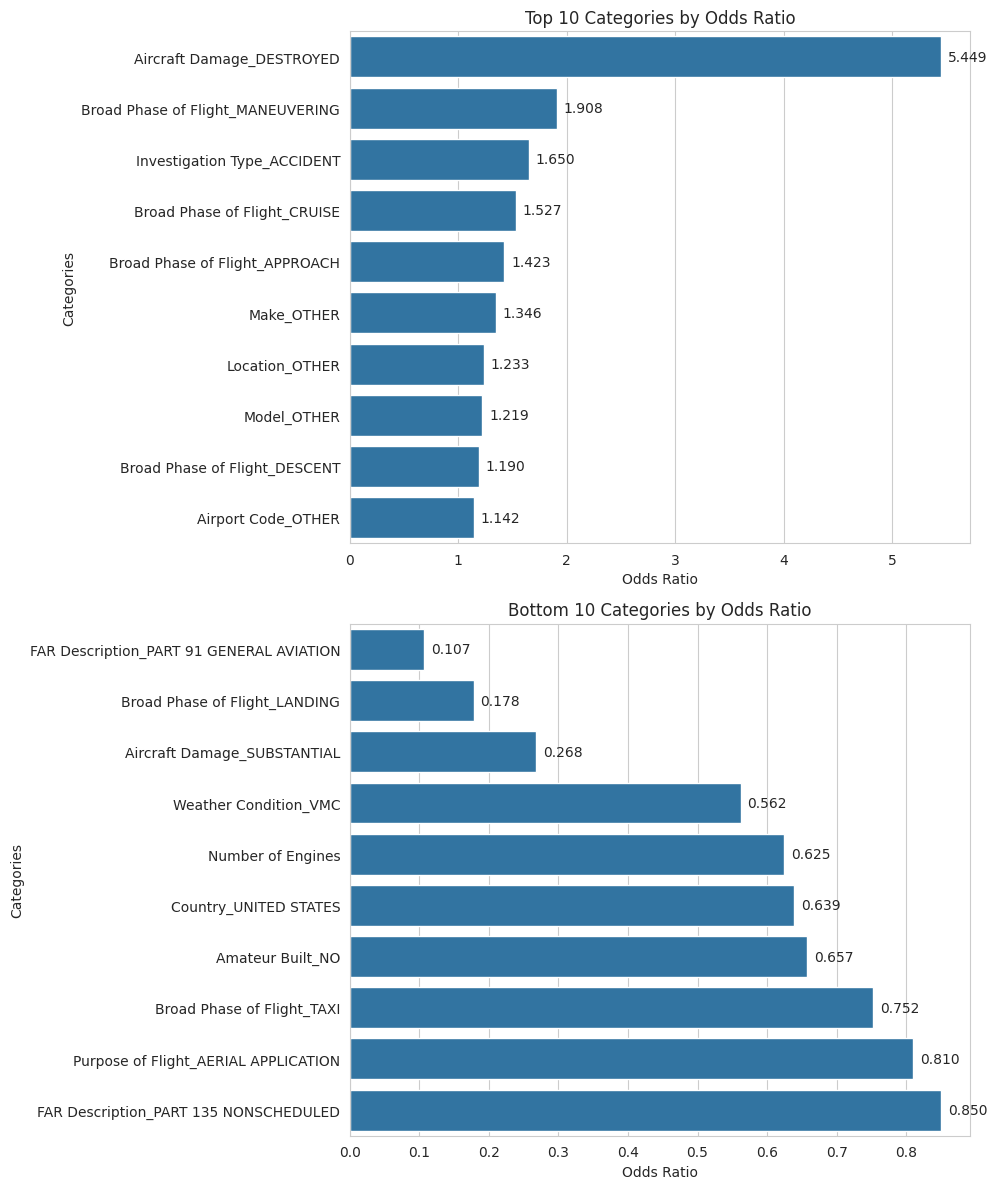

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')

# 상위 10개와 하위 10개 범주 추출
top_categories = dft1.nlargest(10, 'Odds_ratio')
bottom_categories = dft1.nsmallest(10, 'Odds_ratio')

# 그래프 그리기
fig, axes = plt.subplots(2, 1, figsize=(10, 12))  # 2개의 서브플롯 생성

# 상위 10개 그래프
sns.barplot(ax=axes[0], y=top_categories.index, x="Odds_ratio", data=top_categories)
axes[0].set_title('Top 10 Categories by Odds Ratio')
axes[0].set_xlabel('Odds Ratio')
axes[0].set_ylabel('Categories')

# 주석 추가
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_width():.3f}", (p.get_width(), p.get_y() + p.get_height() / 2),
                    xytext=(5, 0), textcoords='offset points', ha='left', va='center')

# 하위 10개 그래프
sns.barplot(ax=axes[1], y=bottom_categories.index, x="Odds_ratio", data=bottom_categories)
axes[1].set_title('Bottom 10 Categories by Odds Ratio')
axes[1].set_xlabel('Odds Ratio')
axes[1].set_ylabel('Categories')

# 주석 추가
for p in axes[1].patches:
    axes[1].annotate(f"{p.get_width():.3f}", (p.get_width(), p.get_y() + p.get_height() / 2),
                    xytext=(5, 0), textcoords='offset points', ha='left', va='center')

# 그래프 표시
plt.tight_layout()
plt.show()

# 최적 모델 선정 및 판단 근거
위 모든 모델의 정확성 분석 후 최적의 모델을 선정

가장 높은 Accuracy, 두 번째로 높은 ROC로
**그레이디언트 부스팅 모델**을 최적 모델로 선정함.